In [1]:
pip install -r requirements.txt


  Obtaining dependency information for twilio from https://files.pythonhosted.org/packages/97/79/5f996661555ee109ce9a85a93becc5ad9b2757cd99456abf316d76fc98c6/twilio-9.3.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp>=3.8.4 from https://files.pythonhosted.org/packages/10/91/85dcd93f64011434359ce2666bece981f08d31bc49df33261e625b28595d/aiohttp-3.10.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for aiohttp-retry>=2.8.3 from https://files.pythonhosted.org/packages/57/57/af573003eca6248a5cbc538fc46bea5b249c2ac86f27140b0a621bcd3fde/aiohttp_retry-2.8.3-py3-none-any.whl.metadata
  Obtaining dependency information for aiohappyeyeballs>=2.3.0 from https://files.pythonhosted.org/packages/f7/d8/120cd0fe3e8530df0539e71ba9683eade12cae103dd7543e50d15f737917/aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for yarl<2.0,>=1.12.0 from https://files.pythonhosted.org/packages/75/e3/2a746721d6f32886d9bafccdb8017434

In [1]:
import requests
import pandas as pd

def fetch_wind_data(api_key, lat, lon):
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        wind_speed = data['wind']['speed']
        wind_direction = data['wind']['deg']
        return {'wind_speed': wind_speed, 'wind_direction': wind_direction}
    else:
        print("Error response:", response.status_code, response.text)
        raise Exception("Failed to fetch data")

# Usage Example
api_key = "Your_key_here"
location = {"lat": 35.0, "lon": -120.0}
wind_data = fetch_wind_data(api_key, location['lat'], location['lon'])
print("Real-time Wind Data:", wind_data)


Real-time Wind Data: {'wind_speed': 2.48, 'wind_direction': 89}


In [2]:
import numpy as np

def preprocess_data(data):
    data['wind_speed_sq'] = np.square(data['wind_speed'])
    data['wind_direction_rad'] = np.radians(data['wind_direction'])
    # Add more features if needed
    return data

# Simulate a data point for demonstration
data = pd.DataFrame([wind_data])
processed_data = preprocess_data(data)
print("Processed Data:", processed_data)


Processed Data:    wind_speed  wind_direction  wind_speed_sq  wind_direction_rad
0        2.48              89         6.1504            1.553343


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume we have a dataset `df` with historical data and labels for extreme events
df = pd.DataFrame({
    'wind_speed': np.random.uniform(0, 30, 1000), 
    'wind_direction': np.random.uniform(0, 360, 1000),
    'extreme_event': np.random.randint(0, 2, 1000)
})
df = preprocess_data(df)

X = df[['wind_speed', 'wind_speed_sq', 'wind_direction_rad']]
y = df['extreme_event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))


Model Accuracy: 0.525


In [4]:
from twilio.rest import Client

def send_alert(message):
    # Twilio client setup
    account_sid = 'AC1f6c0ebd047305505b1ef1f6f70e75ad'
    auth_token = '7729367f751ba85eaed3d78e6d4912eb'
    client = Client(account_sid, auth_token)

    client.messages.create(
        body=message,
        from_='+14695303125',
        to='+919835732686'
    )

def detect_and_alert(data_point):
    # Process new data and predict
    processed = preprocess_data(pd.DataFrame([data_point]))
    is_extreme = model.predict(processed[['wind_speed', 'wind_speed_sq', 'wind_direction_rad']])[0]
    
    if is_extreme:
        message = f"Extreme wind detected! Speed: {data_point['wind_speed']} m/s"
        send_alert(message)
        print(message)

# Example alert on real-time data
detect_and_alert(wind_data)


Extreme wind detected! Speed: 2.48 m/s


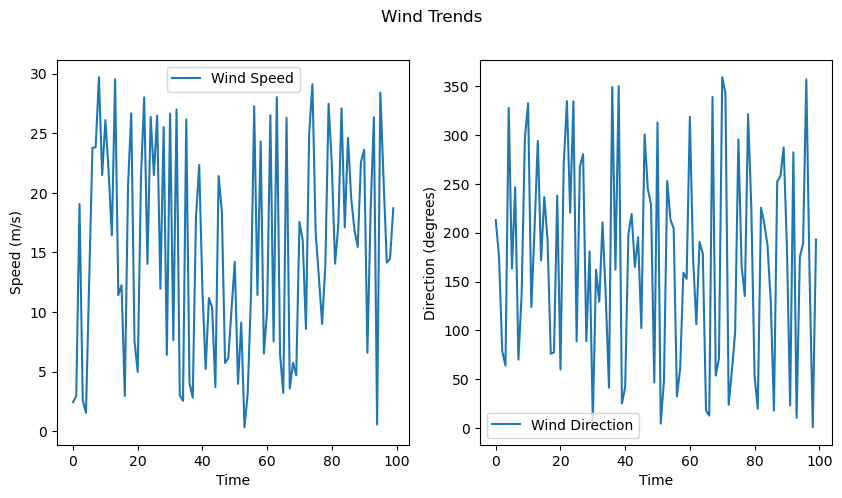

In [5]:
import matplotlib.pyplot as plt

def plot_wind_trends(data):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(data['wind_speed'], label="Wind Speed")
    plt.xlabel("Time")
    plt.ylabel("Speed (m/s)")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(data['wind_direction'], label="Wind Direction")
    plt.xlabel("Time")
    plt.ylabel("Direction (degrees)")
    plt.legend()
    
    plt.suptitle("Wind Trends")
    plt.show()

# Plot the data (requires a history of wind data points)
plot_wind_trends(df.head(100))
